# Exploratory Data Analysis for utility data

This work is to perform explorative data analysis on the data provided. The data will be cleaned, wrangled and explored. statistical analysis will also be performed to determine key objectives. Some intersting visualisation will be displayed to better explain some points.

The operating costs of each plants will be explored to see how fuel costs impact the viability of he different generation sources. The competitiveness of renewable electricity will be will be higlighted and the we will also show how the generation mix of dofferent utilities evolved.

The first thing to do is to import important libraries that will enable us perform the analysis without any hassle. The libraries are imported below. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

The data is imported below for us to get started. the data can be assessed [here]('https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true').

In [2]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

ferc_data = pd.read_csv(url) #This converts the data to a dataframe

Below we display a few  columns to have an overview of the data.

In [3]:
ferc_data.head() #this gives us the first five rows of the data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In the next lines of code, we will determine the type of data in each column, check if there are missing datas or values and also if there are any duplicate columns

In [4]:
ferc_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [5]:
ferc_data.isnull().sum() #to determine missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
ferc_data.duplicated().any() #this gives a boolean expression

False

From the above, it can be seen that the fuel unit column has 180 missing values but thankfully, there are no duplicate rows. 
After getting this, the next step is to decide what to do with the missing values. Whether to delete or fill them. The missing values are of object type and would not affect the calculations to be done. The missing values will be filled with the most popular unit in the column.

The most popular unit is determined below.

In [7]:
ferc_data['val'] = ferc_data.groupby('fuel_unit')['fuel_unit'].transform('count')

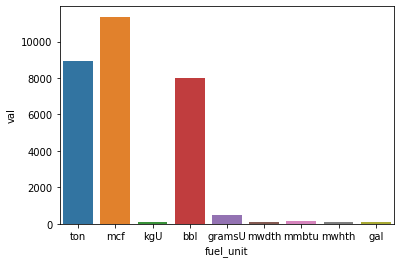

In [8]:
sns.barplot(data =ferc_data, x= 'fuel_unit', y= 'val')

'mcf' is the most popular fuel unit. Therefore, the missing values will be filled with this unit. 

In [9]:
ferc_data['fuel_unit'] = ferc_data['fuel_unit'].fillna('mcf')

In [10]:
ferc_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                         0
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
val                             180
dtype: int64

Next we are going to explore some statistical information of the data

In [11]:
ferc_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,val
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000,29343.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354,9317.825751
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939,2235.493467
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000,84.000000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000,7998.000000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000,8958.000000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000,11354.000000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000,11354.000000


Looking at the table above, we can see that there might be some possible outliers in the data. this assertion is given due to
negative values in the fuel cost per unit delivered, fuel cost per unit burned and consequently fuel cost per mmbtu. But the
data will be analysed like it is as the topic of outliers was not taught in this course. we will try not to go over the
syllabus.

Next we will try to calculate the operating cost of the plants.From the table,it can be seen that the fuel cost per unit per -
unit burned is the multiplication of the fuel cost per mmbtu and the fuel mmbtu per unit columns. The operating cost of the can
be said to be the multiplication of thr fuel cost per unit delivered and the fuel quantity burned.

In [12]:
operation = ferc_data['fuel_cost_per_unit_delivered'] * ferc_data['fuel_qty_burned']
print(operation)

0        9.964487e+07
1        1.943231e+08
2        1.135474e+08
3        1.719789e+08
4        1.122764e+05
             ...     
29518    8.985922e+04
29519    2.944564e+06
29520    4.987226e+05
29521    4.663348e+06
29522    0.000000e+00
Length: 29523, dtype: float64


In [13]:
ferc_data.insert(3, 'Operational cost', operation)

In [14]:
ferc_data.head()

,record_id,utility_id_ferc1,report_year,Operational cost,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,val
0,f1_fuel_1994_12_1_0_7,1,1994,9.964487e+07,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,8958.0
1,f1_fuel_1994_12_1_0_10,1,1994,1.943231e+08,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,8958.0
2,f1_fuel_1994_12_2_0_1,2,1994,1.135474e+08,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,8958.0
3,f1_fuel_1994_12_2_0_7,2,1994,1.719789e+08,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,8958.0
4,f1_fuel_1994_12_2_0_10,2,1994,1.122764e+05,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,11354.0


Below we will try to get the operational costs, plants name and fuel type clumn in one place to try and get a better picture of how the type of fuel used affects the operational costs in the different plants.

In [15]:
ferc_data.groupby(['Operational cost', 'plant_name_ferc1', 'fuel_type_code_pudl']).size()

Operational cost  plant_name_ferc1  fuel_type_code_pudl
-1.319576e+07     cobb 4 - 5        coal                   1
-2.113068e+06     french island     waste                  1
-1.995665e+06     french island     waste                  1
-1.952705e+06     french island     waste                  1
-1.830137e+06     french island     waste                  1
                                                          ..
 1.020569e+11     hope creek 1      nuclear                1
 1.243225e+11     hope creek 1      nuclear                1
 2.161602e+11     coyote            coal                   1
 1.647597e+12     peach bt 2&3      nuclear                1
 1.676325e+12     peach bt 2&3      nuclear                1
Length: 26696, dtype: int64

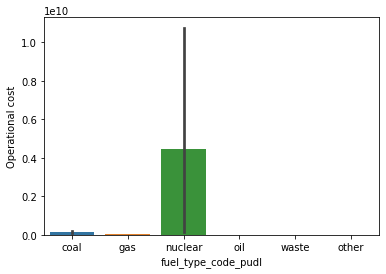

In [16]:
sns.barplot(data = ferc_data, x= 'fuel_type_code_pudl', y = 'Operational cost')

From the above table,it can be seen that the high operating cost come from plants that use the renewable means of fuel.
the highest been the plants that use nuclear source of fuel. it can be inferred that the renewable source of fuel are not competitive as they cost more in operation.this can be due to the fact that the technologies required to properly use this technologies is not in place yet.

# test code
Below are the codes that were used to answer the question that were not already present in the EDA done earlier before.

In [17]:
ferc_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [18]:
ferc_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values()

report_year
1999       25.551627
1995       32.735269
2006       38.657484
2005       41.438184
2007       43.325023
2017       46.196861
2002       47.594361
2003       55.663493
2008       58.588197
2011       59.774667
2001       60.050396
2012       60.994502
1994       63.636060
2010       91.862105
2016      103.901761
2004      139.524275
2013      172.307591
2014      192.737183
1998      287.154420
2015      326.535511
2018      499.269966
2009      652.694163
2000      985.362877
1996     9196.705948
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64

In [19]:
ferc_data['fuel_qty_burned'].skew()

15.851495469109503

In [20]:
ferc_data['fuel_qty_burned'].kurtosis()

651.3694501337732

In [21]:
yearly_costs = ferc_data.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

year_1994, year_1998 = yearly_costs.loc[[1994,1998], 'coal']

pch = ((year_1998 - year_1994)/year_1994)*100

pch

-20.56765451826049

In [22]:
ferc_data.corr().loc['fuel_cost_per_unit_burned'].sort_values()

val                            -0.208106
utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
Operational cost                0.003764
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64